In [2]:
#import module
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.integrate import solve_ivp
from scipy.optimize import curve_fit
from numpy import exp
import glob
 
#modify the font
#plt.rcParams['配置参数']=[修改值]进行修改
#运行配置参数中的字体（font）为黑体（SimHei）
plt.rcParams['font.sans-serif'] = ['SimHei'] 
%matplotlib inline 
%config InlineBackend.figure_format = 'svg' 

#ignore the warnings
import warnings
warnings.filterwarnings('ignore')

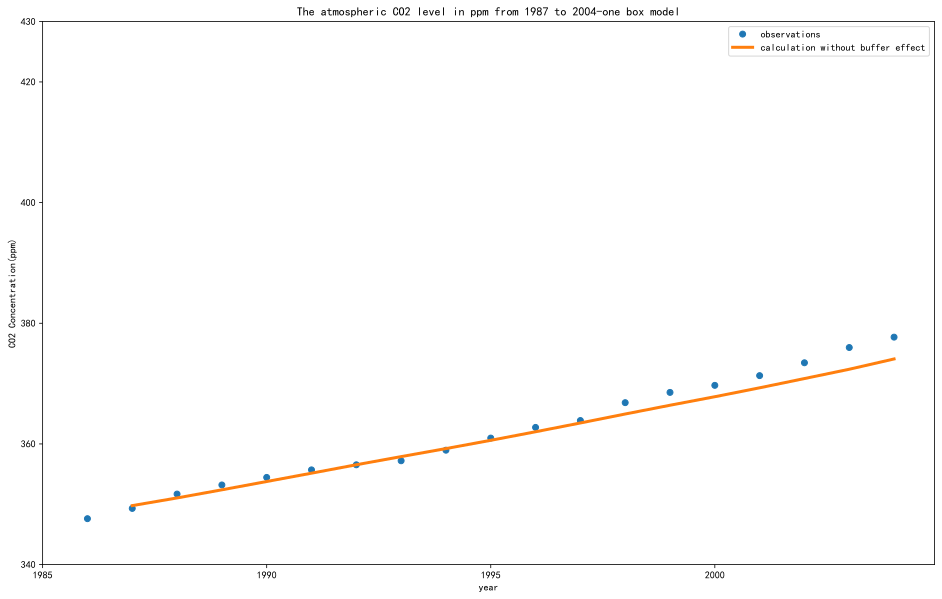

In [3]:
#1.1
#read the file
data = pd.read_csv("co2_annmean_mlo.csv",
                 skiprows = 55)
CO2=data.loc[ (data['year'] >1985)&(data['year'] <2005)][['year','mean']]

#define γ (This step is taught by Yin Yuling)
def γ(t):
    #get the fossil fuel data
    data2 = pd.read_csv("global.1751_2008 (3).csv")
    γ=float(data2.loc[ (data2['Year"'] ==int(t))]['Total carbon emissions from fossil-fuels (million metric tons of C)']/1000/2.13)
    return γ

#define a function to resovel the equation
def fuc(f, t, k12, k21):
    N1,N2=f
    dfdt = [-k12*N1+k21*N2+γ(t),k12*N1-k21*N2]
    return dfdt

k12 = 105/740
k21 = 102/900
f0 = [740/2.13,900/2.13]
t = np.linspace(1985,2004,20)

#solve ODE
f = integrate.odeint(fuc, f0, t, args=(k12,k21))
ans1 = f[2:,0]

#plot (Yin Yuling told me that the results need to plot)
plt.figure(figsize=(16,10),dpi=120)
plt.plot(CO2['year'], CO2['mean'],'o',label='observations', markersize=6)
plt.plot(t[2:], ans1,label='calculation without buffer effect', linewidth=3)
plt.xlabel('year')
plt.ylabel('CO2 Concentration(ppm)')
plt.xticks([1985,1990,1995,2000])
plt.yticks([340,360,380,400,420,430])
plt.legend(loc='best')
plt.title('The atmospheric CO2 level in ppm from 1987 to 2004-one box model')
plt.show()

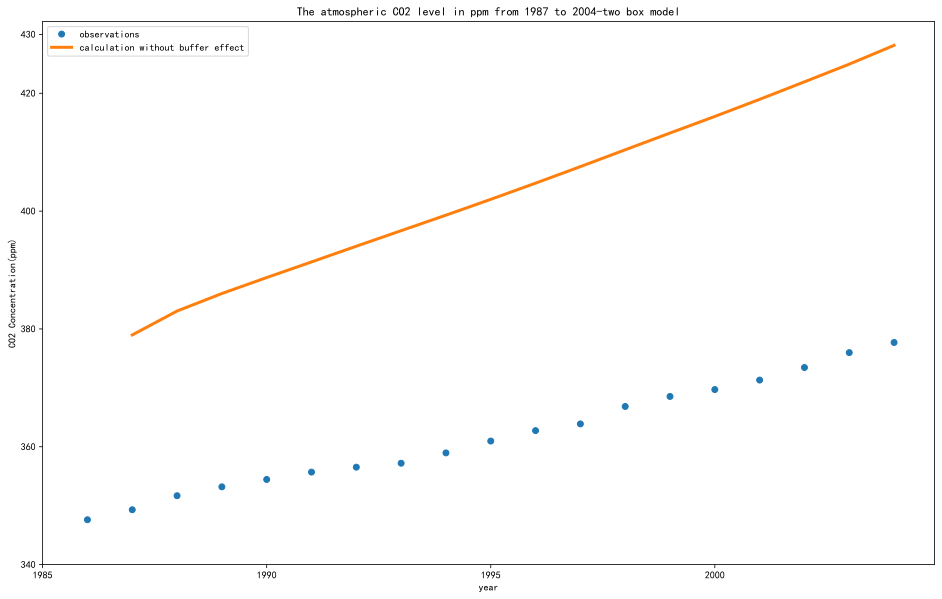

In [4]:
#1.2
#read the file
data = pd.read_csv("co2_annmean_mlo.csv",
                 skiprows = 55)
CO2=data.loc[ (data['year'] >1985)&(data['year'] <2005)][['year','mean']]

#define γ (the same as 1.1)
def γ(t):
    #get the fossil fuel data
    data2 = pd.read_csv("global.1751_2008 (3).csv")
    γ=float(data2.loc[ (data2['Year"'] ==int(t))]['Total carbon emissions from fossil-fuels (million metric tons of C)']/1000/2.13)
    return γ

#define x to caculate the parameter 
def x(N1):
    x=3.69+1.86*(1e-2)*N1-1.8*(1e-6)*N1*N1
    return x

#define a function to resovel the equation
def fuc(f, t, k12, k21, N20):
    N1,N2=f
    dfdt = [-k12*N1+k21*(N20+x(N1)*(N2-N20))+γ(t),k12*N1-k21*(N20+x(N1)*(N2-N20))]
    return dfdt

k12 = 105/740
k21 = 102/900
N20 = 821/2.13
f0 = [740/2.13,900/2.13]
t = np.linspace(1985,2004,20)

# caculate the ode
f = integrate.odeint(fuc, f0, t, args=(k12,k21,N20))
ans2 = f[2:,0]

#plot
plt.figure(figsize=(16,10),dpi=120)
plt.plot(CO2['year'], CO2['mean'],'o',label='observations', markersize=6)
plt.plot(t[2:], ans2,label='calculation without buffer effect', linewidth=3)
plt.xlabel('year')
plt.ylabel('CO2 Concentration(ppm)')
plt.xticks([1985,1990,1995,2000])
plt.yticks([340,360,380,400,420,430])
plt.legend(loc='best')
plt.title('The atmospheric CO2 level in ppm from 1987 to 2004-two box model')
plt.show()

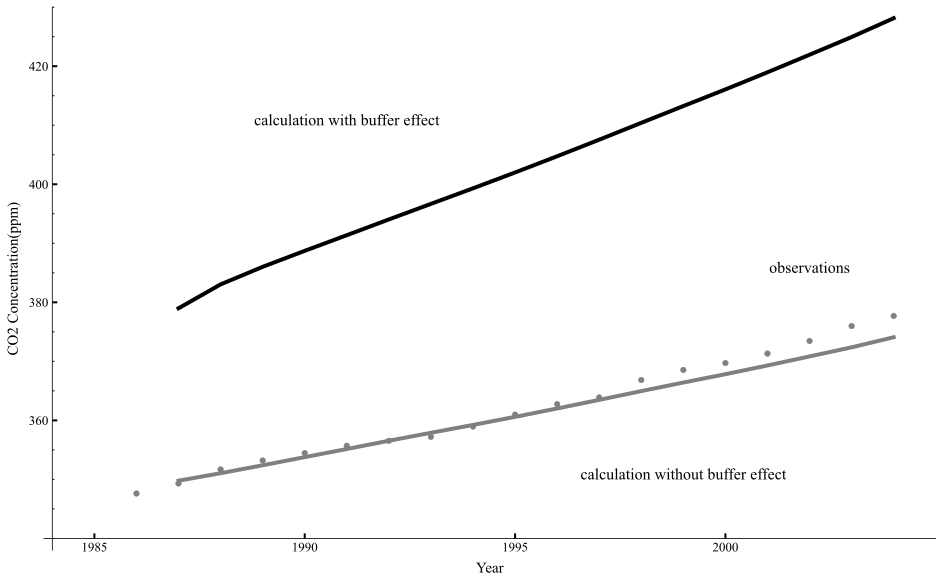

In [5]:
#1.3
#Set the Font
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
plt.rcParams['mathtext.default'] = 'regular'

#Set the figure size
fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(1, 1, 1)

#Remove the right border and top border
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#Set the scale and ticks of the coordinate axis
plt.xlim(1983.8,2005)
ax.tick_params(axis='x',which='major',direction='in',width=2,length=5, pad=4,labelsize=13)
ax.set_xticks(np.arange(1985, 2000 + 5, 5))
ax.set_xticks(np.arange(180, 180 + 2.5, 2.5), minor=True)
ax.set_xlabel('Year',labelpad=8,fontsize=15)
plt.ylim(338,430)
ax.tick_params(axis='y',which='major',direction='in',width=2,length=5, pad=4,labelsize=13)
ax.tick_params(axis='y',which='minor',direction='in',width=1,length=2)
ax.set_yticks(np.arange(360, 420 + 20, 20))
ax.set_yticks(np.arange(340, 430 + 5, 5), minor=True)
ax.set_ylabel('CO2 Concentration(ppm)',labelpad=8,fontsize=15)

#Set the origin of axes and plot it(ask for Yin Yuling)
ax.spines['bottom'].set_position(('data',340))
ax.spines['left'].set_position(('data',1984))
ax.plot(t[2:], ans1[:],linewidth=4,color='grey',label='calculation without buffer effect')
ax.plot(t[2:], ans2[:],linewidth=4,color='k',label='calculation with buffer effect')
ax.scatter(CO2['year'], CO2['mean'],s=32,c='grey',marker='o',lw=0.5,label='observations')

#add the text
ax.text(1999,350,
        "calculation without buffer effect",
        horizontalalignment ='center',
        fontsize = 16,zorder=2)
ax.text(1991,410,
        "calculation with buffer effect",
        horizontalalignment ='center',
        fontsize = 16,zorder=2)
ax.text(2002,385,
        "observations",
        horizontalalignment ='center',
        fontsize = 16,zorder=2)
plt.show()

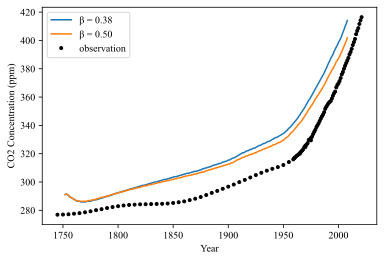

In [22]:
# Bonus
#This code comes from Shi Shao, he taught us about how to understand the question. Li Yanchen and Shenhan are participate also.
import math
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from math import e


# read the data of gama
gama = np.loadtxt("global.1751_2008 (3).csv", delimiter=",", skiprows = 2, usecols = 1)/10**3
# create year vector
yearCount = 2008 - 1751 + 1
t = np.linspace(1751,1751+yearCount-1,yearCount,dtype='int')
# read CO2 observation data 1
co2_1010 = np.loadtxt("co2.csv", delimiter=",", skiprows = 149)
# read CO2 observation data 2
annual_CO2_Obs = np.loadtxt("co2_annmean_mlo.csv", delimiter=",", skiprows = 56 )[:,1]
annual_CO2_Obs_t = np.loadtxt("co2_annmean_mlo.csv", delimiter=",", skiprows = 56 )[:,0]
# read the data of delta
delta = np.empty_like(gama)
delta[0:100] = np.linspace(0.2,0.5,100)
delta[99:-2]= np.loadtxt("Global_land-use_flux-1850_2005.csv", delimiter=",", skiprows = 1, usecols = 1)/10**3
delta[-3:] = delta[-4]

def compute_xi(CO2_ppm):
    xi = 3.69 + 1.86 * 10**-2 * CO2_ppm - 1.80 * 10**-6 * CO2_ppm**2
    return xi 

def compute_f(P,beta):
    f0 = 62
    P0=290.21
    f = f0 * (1 + beta * math.log(P/P0))
    return f

# ODE creation of eq.6 to eq.12
def eq_6_12(N,t,gama,xi,f,delta):
    N02 = 821
    k12 = 60/615
    k21 = 60/842
    k23 = 9/842
    k24 = 43/842
    k32 = 52/9744
    k34 = 162/9744
    k43 = 205/26280
    k45 = 0.2/26280
    k51 = 0.2/90000000
    k67 = 62/731
    k71 = 62/1328
    N1,N2,N3,N4,N5,N6,N7 = N
    dN1dt = -k12 * N1 + k21 * (N02 + xi*(N2 - N02)) + gama - f + delta + k51 * N5 + k71 * N7
    dN2dt = k12 * N1 - k21 * (N02 + xi*(N2 - N02)) - k23 * N2 + k32 * N3 - k24 * N2
    dN3dt = k23*N2 - k32*N3 - k34*N3 +k43*N4
    dN4dt = k34*N3 - k43*N4 + k24*N2 -k45*N4
    dN5dt = k45*N4 - k51*N5
    dN6dt = f - k67*N6 - 2*delta
    dN7dt = k67*N6 - k71*N7 + delta
    return [dN1dt, dN2dt, dN3dt, dN4dt, dN5dt, dN6dt, dN7dt]

N1_eq_6_12_beta1 = np.empty_like(t)
N1_eq_6_12_beta2 = np.empty_like(t)

# beta = 0.38
beta = 0.38
N0 = [615, 842, 9744, 26280, 90000000, 731, 1238]
N1_eq_6_12_beta1[0] = N0[0]
CO2_ppm = N1_eq_6_12_beta1[0]/2.13
xi = compute_xi(CO2_ppm)
f = compute_f(CO2_ppm,beta)
# slove the ODE year by year
for i in range(1,yearCount):
    #set the setp size
    dt = [0,1]    
    # numericly solve the eq.s
    N = odeint(eq_6_12,N0,dt,args=(gama[i-1],xi,f,delta[i-1]))
    # store the result
    N1_eq_6_12_beta1[i] = N[1][0]    
    # initiation of the next step
    CO2_ppm = N1_eq_6_12_beta1[i]/2.13
    N0 = N[1]
    xi = compute_xi(CO2_ppm)
    f = compute_f(CO2_ppm,beta)
    
# beta = 0.50
beta = 0.5
N0 = [615, 842, 9744, 26280, 90000000, 731, 1238]
N1_eq_6_12_beta2[0] = N0[0]
CO2_ppm = N1_eq_6_12_beta2[0]/2.13
xi = compute_xi(CO2_ppm)
f = compute_f(CO2_ppm,beta)
# slove the ODE year by year
for i in range(1,yearCount):
    #set the setp size
    dt = [0,1]    
    # numericly solve the eq.s
    N = odeint(eq_6_12,N0,dt,args=(gama[i-1],xi,f,delta[i-1]))
    # store the result
    N1_eq_6_12_beta2[i] = N[1][0]    
    # initiation of the next step
    CO2_ppm = N1_eq_6_12_beta2[i]/2.13
    N0 = N[1]

    xi = compute_xi(CO2_ppm)
    f = compute_f(CO2_ppm,beta)
    
plt.plot(t[1:],N1_eq_6_12_beta1[1:]/2.13,label='β = 0.38')
plt.plot(t[1:],N1_eq_6_12_beta2[1:]/2.13,label='β = 0.50')
plt.plot(co2_1010[:,0], co2_1010[:,1],'k.')
plt.plot(annual_CO2_Obs_t,annual_CO2_Obs,'k.',label='observation')
plt.ylabel('CO2 Concentration (ppm)')
plt.xlabel('Year')
plt.legend(loc='best')
my_x_ticks = np.arange(1985,2004,3)
plt.show()